In [1]:
import os
os.chdir('../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [ ]:
X_drug, X_target, y  = process_BindingDB('../data/BindingDB_All.tsv',
                                         y = 'Kd', 
                                         binary = False, 
                                         convert_to_log = True)

drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Let's use 1 GPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.634226
Validation at Epoch 1 , MSE: 0.725780701567487 , Pearson Correlation: 0.40398057707518564 with p-value: 2.1550998167531695e-118 , Concordance Index: 0.7271688926134408
Training at Epoch 2 iteration 0 with loss 0.603022
Validation at Epoch 2 , MSE: 0.5726512454403675 , Pearson Correlation: 0.4879649393084924 with p-value: 1.1928492107245293e-179 , Concordance Index: 0.7650372191652788
Training at Epoch 3 iteration 0 with loss 0.72227985
Validation at Epoch 3 , MSE: 0.5525040086756707 , Pearson Correlation: 0.5356641450331265 with p-value: 6.8038841647049305e-223 , Concordance Index: 0.7804433797848193
Training at Epoch 4 iteration 0 with loss 0.6410252
Validation at Epoch 4 , MSE: 0.5703041501774694 , Pearson Correlation: 0.5541856884617206 with p-value: 1.2183007747425456e-241 , Concordance Index: 0.7877413931229313
Training at Epoch 5 iteration 0 with loss 0.57430494

Training at Epoch 41 iteration 0 with loss 0.33248448
Validation at Epoch 41 , MSE: 0.33023237135946826 , Pearson Correlation: 0.7516039622218981 with p-value: 0.0 , Concordance Index: 0.8528141009423819
Training at Epoch 42 iteration 0 with loss 0.20897366
Validation at Epoch 42 , MSE: 0.3329422987347984 , Pearson Correlation: 0.7564631221299889 with p-value: 0.0 , Concordance Index: 0.8556202520748565
Training at Epoch 43 iteration 0 with loss 0.24069251
Validation at Epoch 43 , MSE: 0.4077519352355681 , Pearson Correlation: 0.7507050947749823 with p-value: 0.0 , Concordance Index: 0.8482908347915306
Training at Epoch 44 iteration 0 with loss 0.24760874
Validation at Epoch 44 , MSE: 0.3292789245976155 , Pearson Correlation: 0.7528507687958774 with p-value: 0.0 , Concordance Index: 0.8400832050822564
Training at Epoch 45 iteration 0 with loss 0.20775744
Validation at Epoch 45 , MSE: 0.31573009775373134 , Pearson Correlation: 0.7624827822071432 with p-value: 0.0 , Concordance Index: 0.

Training at Epoch 82 iteration 0 with loss 0.1079582
Validation at Epoch 82 , MSE: 0.29168211834795316 , Pearson Correlation: 0.7942657867509696 with p-value: 0.0 , Concordance Index: 0.869972294253649
Training at Epoch 83 iteration 0 with loss 0.07591695
Validation at Epoch 83 , MSE: 0.29756025245344164 , Pearson Correlation: 0.7943579943692158 with p-value: 0.0 , Concordance Index: 0.8691799485590201
Training at Epoch 84 iteration 0 with loss 0.07741684
Validation at Epoch 84 , MSE: 0.29357583706887136 , Pearson Correlation: 0.8010128081235468 with p-value: 0.0 , Concordance Index: 0.8742335680503728
Training at Epoch 85 iteration 0 with loss 0.090614535
Validation at Epoch 85 , MSE: 0.2859333284412329 , Pearson Correlation: 0.7988325976461027 with p-value: 0.0 , Concordance Index: 0.8749890195995755
Training at Epoch 86 iteration 0 with loss 0.11960477
Validation at Epoch 86 , MSE: 0.29872324837589437 , Pearson Correlation: 0.7852945263006591 with p-value: 0.0 , Concordance Index: 0

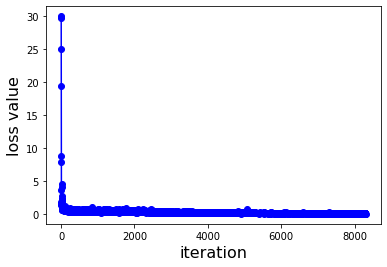

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./model_DeepDTA')